<a href="https://colab.research.google.com/github/noobnoob61/DeepLearning/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Data Augmentation


In [ ]:
from tensorflow.keras.layers import Input, Dense , Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import pandas as pd
import sys, os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"




'Colab Notebooks'  'Food-5k (1).zip'  'hdq-ikdz-ebj – 26 Jul 2024.gjam'


In [ ]:
!ls "/content/drive/My Drive/Food-5k (1).zip"


'evaluation (1)'  'training (1)'  'validation (1)'


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os

In [ ]:
food_folder_path="/content/drive/My Drive/Food-5k (1).zip/training (1)/food"

In [ ]:
image_files=[]

#iterate over each item in directory

for f in os.listdir(food_folder_path):
  if f.endswith(".jpg"):
    image_files.append(f)

print(image_files[:10])

['1_56.jpg', '1_546.jpg', '1_548.jpg', '1_551.jpg', '1_55.jpg', '1_563.jpg', '1_556.jpg', '1_544.jpg', '1_552.jpg', '1_557.jpg']


In [ ]:
image_path= os.path.join(food_folder_path, image_files[3])

print(image_path)

/content/drive/My Drive/Food-5k (1).zip/training (1)/food/1_551.jpg


In [ ]:
img=load_img(image_path, target_size=(224,224))

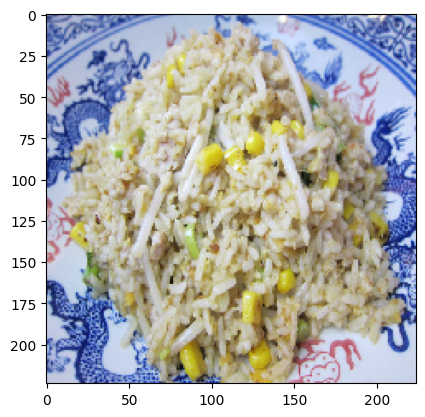

In [ ]:
plt.imshow(img)

In [ ]:
#Renaming the files name

food_folder_v="/content/drive/My Drive/Food-5k (1).zip/validation (1)/food"

nonfood_folder_v="/content/drive/My Drive/Food-5k (1).zip/validation (1)/non_food"

food_folder_t="/content/drive/My Drive/Food-5k (1).zip/training (1)/food"

nonfood_folder_t="/content/drive/My Drive/Food-5k (1).zip/training (1)/non_food"

In [ ]:
def rename(folder_path, prefix):

  images_files=[]
  for f in os.listdir(folder_path):
    if f.endswith(".jpg"):
      images_files.append(f)

  for image in images_files:

     old_file_path=os.path.join(folder_path,image)

     new_image=f"{prefix}_{image}"

     new_file_path=os.path.join(folder_path,new_image)

     os.rename(old_file_path,new_file_path)

     print(f"Renamed {image} to {new_image}")

rename(nonfood_folder_v,"0")
rename(nonfood_folder_t,"0")
rename(food_folder_v,"1")
rename(food_folder_t,"1")

Renamed 104.jpg to 0_104.jpg
Renamed 1.jpg to 0_1.jpg
Renamed 108.jpg to 0_108.jpg
Renamed 106.jpg to 0_106.jpg
Renamed 105.jpg to 0_105.jpg
Renamed 107.jpg to 0_107.jpg
Renamed 101.jpg to 0_101.jpg
Renamed 10.jpg to 0_10.jpg
Renamed 103.jpg to 0_103.jpg
Renamed 0.jpg to 0_0.jpg
Renamed 109.jpg to 0_109.jpg
Renamed 100.jpg to 0_100.jpg
Renamed 102.jpg to 0_102.jpg
Renamed 123.jpg to 0_123.jpg
Renamed 12.jpg to 0_12.jpg
Renamed 125.jpg to 0_125.jpg
Renamed 116.jpg to 0_116.jpg
Renamed 110.jpg to 0_110.jpg
Renamed 119.jpg to 0_119.jpg
Renamed 122.jpg to 0_122.jpg
Renamed 124.jpg to 0_124.jpg
Renamed 112.jpg to 0_112.jpg
Renamed 118.jpg to 0_118.jpg
Renamed 117.jpg to 0_117.jpg
Renamed 11.jpg to 0_11.jpg
Renamed 127.jpg to 0_127.jpg
Renamed 111.jpg to 0_111.jpg
Renamed 126.jpg to 0_126.jpg
Renamed 115.jpg to 0_115.jpg
Renamed 120.jpg to 0_120.jpg
Renamed 121.jpg to 0_121.jpg
Renamed 128.jpg to 0_128.jpg
Renamed 113.jpg to 0_113.jpg
Renamed 129.jpg to 0_129.jpg
Renamed 114.jpg to 0_114.jpg

In [ ]:
!rm -r data

In [ ]:
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/food
!mkdir data/test/nonfood

In [ ]:
# move the images
# we will consider:
#        train = training
#        test= validation
#  ignore: evaluation data

!cp -r "/content/drive/My Drive/Food-5k (1).zip/training (1)/non_food/" data/train/nonfood
!cp -r "/content/drive/My Drive/Food-5k (1).zip/validation (1)/food/" data/test/food
!cp -r "/content/drive/My Drive/Food-5k (1).zip/validation (1)/non_food/" data/test/nonfood
!cp -r "/content/drive/My Drive/Food-5k (1).zip/training (1)/food/" data/train/food



In [ ]:
!ls data/test/food/food

1_0.jpg    1_150.jpg  1_200.jpg  1_251.jpg  1_301.jpg  1_352.jpg  1_402.jpg  1_453.jpg	1_53.jpg
1_100.jpg  1_151.jpg  1_201.jpg  1_252.jpg  1_302.jpg  1_353.jpg  1_403.jpg  1_454.jpg	1_54.jpg
1_101.jpg  1_152.jpg  1_202.jpg  1_253.jpg  1_303.jpg  1_354.jpg  1_404.jpg  1_455.jpg	1_55.jpg
1_102.jpg  1_153.jpg  1_203.jpg  1_254.jpg  1_304.jpg  1_355.jpg  1_405.jpg  1_456.jpg	1_56.jpg
1_103.jpg  1_154.jpg  1_204.jpg  1_255.jpg  1_305.jpg  1_356.jpg  1_406.jpg  1_457.jpg	1_57.jpg
1_104.jpg  1_155.jpg  1_205.jpg  1_256.jpg  1_306.jpg  1_357.jpg  1_407.jpg  1_458.jpg	1_58.jpg
1_105.jpg  1_156.jpg  1_206.jpg  1_257.jpg  1_307.jpg  1_358.jpg  1_408.jpg  1_459.jpg	1_59.jpg
1_106.jpg  1_157.jpg  1_207.jpg  1_258.jpg  1_308.jpg  1_359.jpg  1_409.jpg  1_45.jpg	1_5.jpg
1_107.jpg  1_158.jpg  1_208.jpg  1_259.jpg  1_309.jpg  1_35.jpg   1_40.jpg   1_460.jpg	1_60.jpg
1_108.jpg  1_159.jpg  1_209.jpg  1_25.jpg   1_30.jpg   1_360.jpg  1_410.jpg  1_461.jpg	1_61.jpg
1_109.jpg  1_15.jpg   1_20.jpg	 1_260.jpg 

In [ ]:
train_path='data/train'
test_path='data/test'

In [ ]:
IMAGE_SIZE=[200,200]

In [ ]:
# useful for getting number of files

image_files= glob(train_path + '/*/*/*.jpg')
test_image_files= glob(test_path + '/*/*/*.jpg')

In [ ]:
image_files

['data/train/food/food/1_809.jpg',
 'data/train/food/food/1_898.jpg',
 'data/train/food/food/1_1025.jpg',
 'data/train/food/food/1_607.jpg',
 'data/train/food/food/1_903.jpg',
 'data/train/food/food/1_802.jpg',
 'data/train/food/food/1_576.jpg',
 'data/train/food/food/1_737.jpg',
 'data/train/food/food/1_911.jpg',
 'data/train/food/food/1_721.jpg',
 'data/train/food/food/1_55.jpg',
 'data/train/food/food/1_1075.jpg',
 'data/train/food/food/1_670.jpg',
 'data/train/food/food/1_894.jpg',
 'data/train/food/food/1_10.jpg',
 'data/train/food/food/1_557.jpg',
 'data/train/food/food/1_620.jpg',
 'data/train/food/food/1_822.jpg',
 'data/train/food/food/1_1132.jpg',
 'data/train/food/food/1_591.jpg',
 'data/train/food/food/1_881.jpg',
 'data/train/food/food/1_560.jpg',
 'data/train/food/food/1_1067.jpg',
 'data/train/food/food/1_689.jpg',
 'data/train/food/food/1_117.jpg',
 'data/train/food/food/1_882.jpg',
 'data/train/food/food/1_0.jpg',
 'data/train/food/food/1_862.jpg',
 'data/train/food/fo

In [ ]:
# useful for getting number of subdirectories

folders=glob(train_path + '/*')

folders

['data/train/food', 'data/train/nonfood']

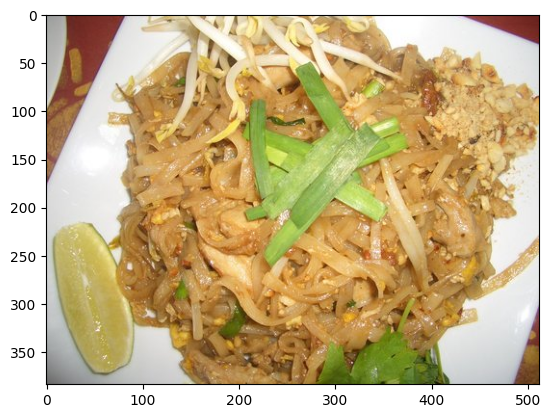

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [ ]:
# pretrained model vgg16

ptm = PretrainedModel(
    input_shape=IMAGE_SIZE +[3],
    weights='imagenet',
    include_top=False
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
ptm.trainable=False

In [ ]:
import tensorflow as tf

data_augmentation=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1)
    ]
)

In [ ]:
# map the data into feature vectors

# Keras image data generator returns classes one-hot encoded

K= len(folders) # no. of classes
i= Input(shape=IMAGE_SIZE + [3])
x= data_augmentation(i)
x= ptm(x)
x= Flatten()(x)
x= Dense(K,activation='softmax')(x)

In [ ]:
model=Model(inputs=ptm.input,outputs=x)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 200, 200, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 6, 6, 512)      │     14,714,688 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 18432)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │         36,866 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,751,554 (56.27 MB)

 Trainable params: 36,866 (144.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:

# Data augmentation

gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [ ]:
batch_size=125

In [ ]:
# create generators

train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,

)

test_generator = gen.flow_from_directory(
    test_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,

)

Found 2193 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

In [ ]:
#fit the model

r=model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
    validation_steps=int(np.ceil(len(test_image_files)/batch_size))
)

Epoch 1/10


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m136925074598896\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)\n  • training=True\n  • mask=None'

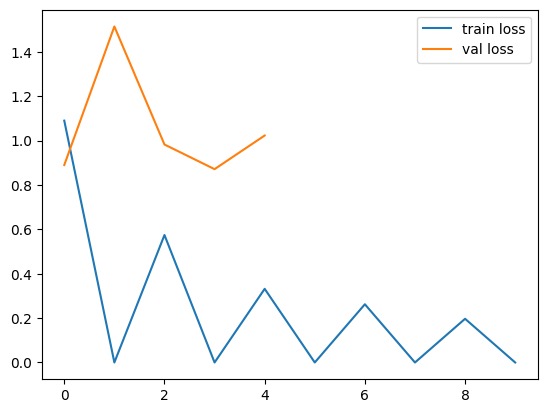

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

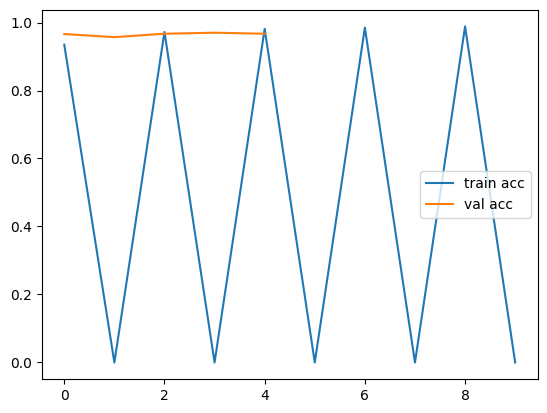

In [ ]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()